## The point of this analysis is to see how Lebrons game has changed, how he has continued to be so dominant in the league.

In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("Lebron Data.csv")
df_s = df.head(18)
df_career = df.iloc[18]
df_teams = df.tail(3)

## Effectively we have split the given data. 
# $$ df \_s : \text{General annual seasons performance}  $$
# $$ df \_ career : \text{The given career averages or totals} $$
# $$ df \_ teams : \text{Given team averages or totals} $$

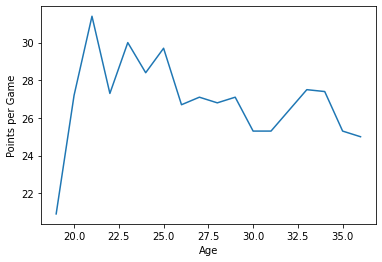

In [4]:
plt.xlabel("Age")
plt.ylabel("Points per Game")
plt.plot(df_s["Age"], df_s['PTS'])

## Looking at Lebrons points, we can see that he peaked at over 30 points per game and then he slowly tapered off. So far, he still remains at around 25 points per game. What we are used to seeing is him dominate through the paint trucking past everyone. But as you get older, you'd expect him to be less explosive and not able to muscle his way through traffic. So our analysis will work around how Lebron has changed his game over the years.

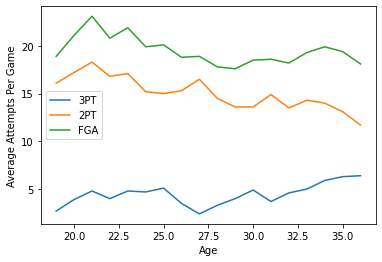

In [5]:
plt.xlabel("Age")
plt.ylabel("Average Attempts Per Game")
plt.plot(df_s["Age"], df_s['3PA'], label="3PT")
plt.plot(df_s["Age"], df_s["2PA"], label="2PT")
plt.plot(df_s["Age"], df_s['FGA'], label="FGA")
plt.legend()

## As you can see just from a viewing perspective, Lebrons 3's attempts are steadily increasing, while his 2PT attempts are steadily decreasing. Now he's still taking a good amount of attempts, but you'd think that having so much success in the paint he'd stay there. What we are seeing now is Lebron starting to work around the perimeter more and more. 

## Now working with this current data, I want to hypothesize that LBJ takes less than 25% of his shots from beyond the arc overall including all of his season.
# Null hypothesis: $$ 3PT \geq 0.25 * FGA$$
# Alternate Hypothesis: $$3PT <0.25 * FGA$$
## With $$\alpha = 0.05 $$

In [6]:
avg_FGA = df_s["FGA"].mean()
avg_3PA = df_s["3PA"].mean()
n = df_s["Season"].count() 
s = np.std(df_s['3PA'])
f"Our average Field Goal Attempts are {avg_FGA.round(2)} and Lebrons average 3 point attempts are {avg_3PA.round(2)}"

'Our average Field Goal Attempts are 19.49 and Lebrons average 3 point attempts are 4.44'

In [7]:
f"Total number of samples is {n}"

'Total number of samples is 18'

In [8]:
t = (avg_3PA - (0.25 * avg_FGA))/(s / np.sqrt(n))
z_score = scipy.stats.norm.cdf(t, loc=0, scale=1)

In [9]:
f"Our calculated test statistic is {t}, locating the value on a Normal Distribution we find {z_score} to be our z_score"

'Our calculated test statistic is -1.6720761812358669, locating the value on a Normal Distribution we find 0.047254650394456005 to be our z_score'

# Given that the test statistics is less then 0.05, we can declare that with 5% confidence Lebron's overall career 3 point attempts is less then 25% of total field goal attempts. 

c:\users\andrew\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


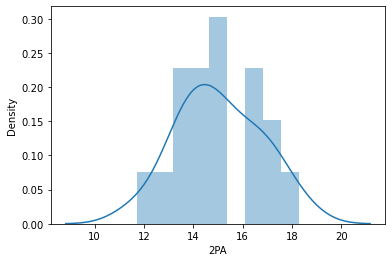

In [10]:
sns.distplot(df_s['2PA'], bins=9)

## Placing the 2 point field goal attempts in a normal distribution, we can see that there is a peak within the center very similar to a bell shape. Now this is kind of weird, but reading up on Lebron's start, he was actually a perimeter player who liked to get teammates involved first. As he got older, he started to use his size a lot of more down in the post, which means he also had to score from the post as well. Kobe himself described Lebron's game in the video below.

# @ 1:00
# https://www.youtube.com/watch?v=PGxETnTnZaQ&t=105s

1.1296869625043016
[0.12053664]
[5.34846921]


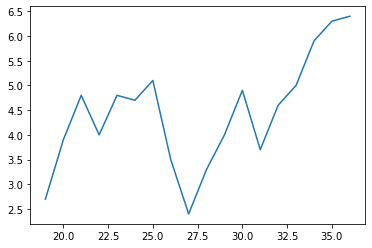

In [25]:
age = df_s["Age"].values.reshape(-1,1)
y = df_s["3PA"]
model = LinearRegression().fit(age, y)
plt.plot(age, y)
print(model.intercept_)
print(model.coef_)
print(model.coef_ * 35 + model.intercept_)

In [65]:
df.loc[2]

Season    2005-06
Age            21
Team          CLE
Lg            NBA
Pos            SF
G              79
GS             79
MP           42.5
FG           11.1
FGA          23.1
FG%          0.48
3P            1.6
3PA           4.8
3P%         0.335
2P            9.5
2PA          18.3
2P%         0.518
eFG%        0.515
FT            7.6
FTA          10.3
FT%         0.738
ORB           0.9
DRB           6.1
TRB             7
AST           6.6
STL           1.6
BLK           0.8
TOV           3.3
PF            2.3
PTS          31.4
Name: 2, dtype: object